/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/998 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.33G [00:00<?, ?B/s]

Some weights of the model checkpoint at dbmdz/bert-large-cased-finetuned-conll03-english were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/60.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

Extracted Entities: [{'entity': 'I-PER', 'score': 0.99890506, 'index': 1, 'word': 'Barack', 'start': 0, 'end': 6}, {'entity': 'I-PER', 'score': 0.9994746, 'index': 2, 'word': 'Obama', 'start': 7, 'end': 12}, {'entity': 'I-LOC', 'score': 0.99934536, 'index': 6, 'word': 'Hawaii', 'start': 25, 'end': 31}]


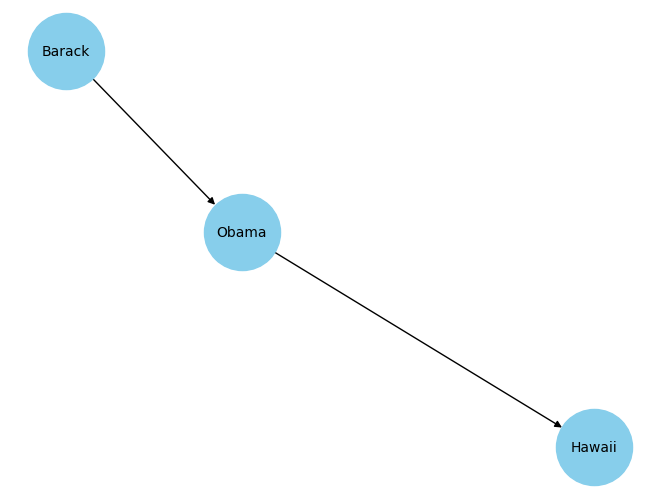

tokenizer_config.json:   0%|          | 0.00/264 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/1.10k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/996k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/709M [00:00<?, ?B/s]

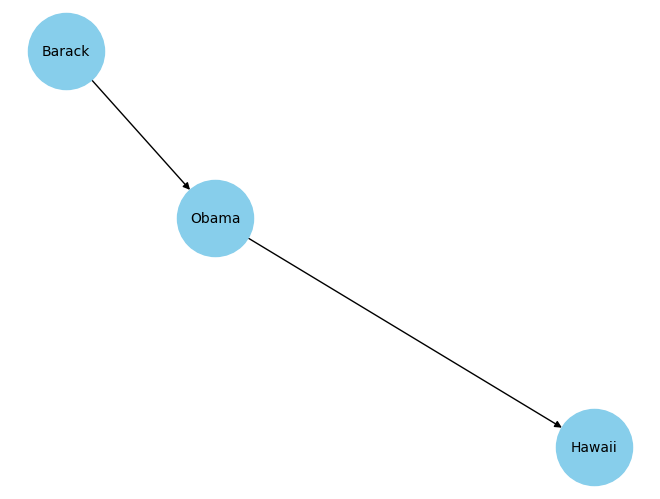

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
from transformers import pipeline, AutoTokenizer, AutoModelForTokenClassification

# Step 1: Initialize NER Pipeline
def initialize_ner_pipeline(model_name):
    return pipeline("ner", model=model_name)

# Step 2: Extract Entities
def extract_entities(ner_pipeline, sentence):
    return ner_pipeline(sentence)

# Step 3: Create Knowledge Graph
def create_knowledge_graph(entities):
    G = nx.DiGraph()

    # Add nodes with labels
    for entity in entities:
        G.add_node(entity['word'], label=entity['entity'])

    # Add edges based on proximity
    for i in range(len(entities) - 1):
        G.add_edge(entities[i]['word'], entities[i + 1]['word'])

    return G

# Step 4: Draw Knowledge Graph
def draw_knowledge_graph(G):
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
    labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.show()

# Step 5: Enhance Knowledge Graph with Dependency Parsing
def enhance_knowledge_graph(sentence):
    # Load dependency parsing model and tokenizer
    tokenizer = AutoTokenizer.from_pretrained("Davlan/bert-base-multilingual-cased-ner-hrl")
    model = AutoModelForTokenClassification.from_pretrained("Davlan/bert-base-multilingual-cased-ner-hrl")

    # Initialize the NER pipeline
    nlp = pipeline("ner", model=model, tokenizer=tokenizer)
    result = nlp(sentence)

    entities = [(res['word'], res['entity']) for res in result]

    # Create a new graph
    G = nx.DiGraph()

    # Add nodes and edges based on extracted entities
    for i, entity in enumerate(entities):
        G.add_node(entity[0], label=entity[1])
        if i > 0:
            G.add_edge(entities[i - 1][0], entity[0])

    # Draw the enhanced graph
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
    plt.show()

# Main function to run the steps
def main():
    model_name = "dbmdz/bert-large-cased-finetuned-conll03-english"
    sentence = "Barack Obama was born in Hawaii. He was elected president in 2008."

    # Step 1: Initialize NER pipeline
    ner_pipeline = initialize_ner_pipeline(model_name)

    # Step 2: Extract entities
    entities = extract_entities(ner_pipeline, sentence)
    print("Extracted Entities:", entities)

    # Step 3: Create knowledge graph
    G = create_knowledge_graph(entities)

    # Step 4: Draw the knowledge graph
    draw_knowledge_graph(G)

    # Step 5: Enhance and draw knowledge graph with dependency parsing
    enhance_knowledge_graph(sentence)

# Run the main function
if __name__ == "__main__":
    main()
